# Week8: Thematic Trends Forecasting with Skytrax Criteria

In [1]:
pip install bertopic

  Obtaining dependency information for tokenizers<0.22,>=0.21 from https://files.pythonhosted.org/packages/22/7a/88e58bb297c22633ed1c9d16029316e5b5ac5ee44012164c2edede599a5e/tokenizers-0.21.0-cp39-abi3-macosx_11_0_arm64.whl.metadata
  Using cached tokenizers-0.21.0-cp39-abi3-macosx_11_0_arm64.whl.metadata (6.7 kB)
Using cached tokenizers-0.21.0-cp39-abi3-macosx_11_0_arm64.whl (2.6 MB)
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.13.3
    Uninstalling tokenizers-0.13.3:
      Successfully uninstalled tokenizers-0.13.3
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install transformers -U

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install sentence-transformers scikit-learn

  Obtaining dependency information for tokenizers<0.22,>=0.21 from https://files.pythonhosted.org/packages/22/7a/88e58bb297c22633ed1c9d16029316e5b5ac5ee44012164c2edede599a5e/tokenizers-0.21.0-cp39-abi3-macosx_11_0_arm64.whl.metadata
  Using cached tokenizers-0.21.0-cp39-abi3-macosx_11_0_arm64.whl.metadata (6.7 kB)
Using cached tokenizers-0.21.0-cp39-abi3-macosx_11_0_arm64.whl (2.6 MB)
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.13.3
    Uninstalling tokenizers-0.13.3:
      Successfully uninstalled tokenizers-0.13.3
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install tokenizers==0.13.3

  Obtaining dependency information for tokenizers==0.13.3 from https://files.pythonhosted.org/packages/0c/e0/f51b2d52fcc2c64e0b81da0a1c68d57b3859212143dbc64b0d175ed78693/tokenizers-0.13.3-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Using cached tokenizers-0.13.3-cp311-cp311-macosx_12_0_arm64.whl.metadata (6.7 kB)
Using cached tokenizers-0.13.3-cp311-cp311-macosx_12_0_arm64.whl (3.9 MB)
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.21.0
    Uninstalling tokenizers-0.21.0:
      Successfully uninstalled tokenizers-0.21.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
transformers 4.47.0 requires tokenizers<0.22,>=0.21, but you have tokenizers 0.13.3 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install --upgrade huggingface_hub

  Obtaining dependency information for huggingface_hub from https://files.pythonhosted.org/packages/44/5a/dc6af87c61f89b23439eb95521e4e99862636cfd538ae12fd36be5483e5f/huggingface_hub-0.26.5-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.8/447.8 kB 13.1 MB/s eta 0:00:00
  Attempting uninstall: huggingface_hub
    Found existing installation: huggingface-hub 0.26.2
    Uninstalling huggingface-hub-0.26.2:
      Successfully uninstalled huggingface-hub-0.26.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
transformers 4.47.0 requires tokenizers<0.22,>=0.21, but you have tokenizers 0.13.3 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade transformers

  Obtaining dependency information for tokenizers<0.22,>=0.21 from https://files.pythonhosted.org/packages/22/7a/88e58bb297c22633ed1c9d16029316e5b5ac5ee44012164c2edede599a5e/tokenizers-0.21.0-cp39-abi3-macosx_11_0_arm64.whl.metadata
  Using cached tokenizers-0.21.0-cp39-abi3-macosx_11_0_arm64.whl.metadata (6.7 kB)
Using cached tokenizers-0.21.0-cp39-abi3-macosx_11_0_arm64.whl (2.6 MB)
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.13.3
    Uninstalling tokenizers-0.13.3:
      Successfully uninstalled tokenizers-0.13.3
Note: you may need to restart the kernel to use updated packages.


# Thematic analysis Overview

In [1]:
import pandas as pd
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer

# Load the original dataset with reviews, sentiment, and published_date
df = pd.read_csv('simplified_reviews_with_sentiment.csv')

# Ensure the 'published_date' is in datetime format
df['published_date'] = pd.to_datetime(df['published_date'], errors='coerce')
df = df.dropna(subset=['published_date'])

# Load the pre-trained model for embeddings
model = SentenceTransformer('all-MiniLM-L6-v2')

# Generate embeddings for the reviews
embeddings = model.encode(df['cleaned_review'].to_list(), show_progress_bar=True)

# Fit the BERTopic model and get topics for each review
topic_model = BERTopic()
topics, _ = topic_model.fit_transform(df['cleaned_review'].to_list(), embeddings)

# Add the topic labels back to the original DataFrame
df['topic'] = topics

# Save the updated DataFrame with topics and original dates
df.to_csv('thematic_analysis_per_review.csv', index=False)
print("Thematic analysis with individual review dates saved successfully!")

Batches:   0%|          | 0/313 [00:00<?, ?it/s]

Thematic analysis with individual review dates saved successfully!


In [2]:
# function for Top 15 Topics
def print_top_topics(topic_model, reviews, sentiment):
    print(f"\nTop 15 Topics for {sentiment.capitalize()} Reviews:")
    topics, _ = topic_model.fit_transform(reviews)
    topic_info = topic_model.get_topic_info().head(15)
    for index, row in topic_info.iterrows():
        print(f"Topic {row['Topic']}: {row['Name']} (Count: {row['Count']})")

import pandas as pd
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer

# Load Model for embeddings
model = SentenceTransformer('all-MiniLM-L6-v2')

# Load Dataset
df = pd.read_csv('thematic_analysis_per_review.csv')

# Separate Positive and Negative Reviews
positive_reviews = df[df['sentiment'] == 'positive']['cleaned_review']
negative_reviews = df[df['sentiment'] == 'negative']['cleaned_review']

# Create embeddings
positive_embeddings = model.encode(positive_reviews.to_list(), show_progress_bar=True)
negative_embeddings = model.encode(negative_reviews.to_list(), show_progress_bar=True)

# Analyst with BERTopic for Positive Reviews
positive_topic_model = BERTopic()
positive_topic_model.fit(positive_reviews.to_list(), positive_embeddings)

# Analyst with BERTopic for Negative Reviews
negative_topic_model = BERTopic()
negative_topic_model.fit(negative_reviews.to_list(), negative_embeddings)

# print Top 15 Topics for Positive Reviews
print_top_topics(positive_topic_model, positive_reviews, 'positive')

# print Top 15 Topics for Negative Reviews
print_top_topics(negative_topic_model, negative_reviews, 'negative')

Batches:   0%|          | 0/177 [00:00<?, ?it/s]

Batches:   0%|          | 0/137 [00:00<?, ?it/s]


Top 15 Topics for Positive Reviews:
Topic -1: -1_flight_singapore_airline_good (Count: 3137)
Topic 0: 0_food_singapore_airline_service (Count: 313)
Topic 1: 1_airline_singapore_always_service (Count: 272)
Topic 2: 2_movie_film_entertainment_good (Count: 130)
Topic 3: 3_food_staff_good_service (Count: 113)
Topic 4: 4_sq_always_flying_flight (Count: 111)
Topic 5: 5_airline_singapore_best_year (Count: 95)
Topic 6: 6_service_great_flight_excellent (Count: 81)
Topic 7: 7_melbourne_singapore_australia_london (Count: 76)
Topic 8: 8_passenger_seat_class_business (Count: 66)
Topic 9: 9_sia_always_service_smile (Count: 56)
Topic 10: 10_comfortable_food_room_leg (Count: 54)
Topic 11: 11_toothbrush_flight_sock_toothpaste (Count: 50)
Topic 12: 12_premium_economy_worth_seat (Count: 49)
Topic 13: 13_business_class_lounge_singapore (Count: 48)

Top 15 Topics for Negative Reviews:
Topic -1: -1_flight_singapore_airline_service (Count: 2629)
Topic 0: 0_food_flight_crew_service (Count: 196)
Topic 1: 1_se

# Thematic analysis by phase

In [12]:
import pandas as pd
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer

# Load the dataset
df = pd.read_csv('cleaned_reviews_with_datetime.csv')

# Convert 'published_date' to datetime and segment the data into phases
df['published_date'] = pd.to_datetime(df['published_date'], errors='coerce')
df = df.dropna(subset=['published_date'])

def determine_phase(date):
    if date < pd.Timestamp('2020-01-01'):
        return 'Pre-COVID'
    elif pd.Timestamp('2020-01-01') <= date <= pd.Timestamp('2021-12-31'):
        return 'During COVID-19'
    else:
        return 'Post-COVID'

# Apply the phase segmentation function
df['phase'] = df['published_date'].apply(determine_phase)

# Load the pre-trained SentenceTransformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Function to generate embeddings
def get_embeddings(reviews):
    return model.encode(reviews.to_list(), show_progress_bar=True)

# Function to perform thematic analysis
def perform_thematic_analysis(reviews, phase, sentiment):
    if len(reviews) == 0:
        print(f"No reviews found for {phase} - {sentiment}. Skipping analysis.")
        return None, None

    print(f"\nPerforming Thematic Analysis for {phase} - {sentiment}...")
    embeddings = get_embeddings(reviews)
    topic_model = BERTopic()
    topics, _ = topic_model.fit_transform(reviews.to_list(), embeddings)
    topic_info = topic_model.get_topic_info()
    topic_info['phase'] = phase
    topic_info['sentiment'] = sentiment
    print(topic_info.head(10))  # Print top topics for this segment
    return topic_model, topic_info

# Analyze reviews for each phase and sentiment
all_topics = []

for phase in ['Pre-COVID', 'During COVID-19', 'Post-COVID']:
    print(f"\nAnalyzing Phase: {phase}")
    phase_data = df[df['phase'] == phase]

    # Positive sentiment
    positive_reviews = phase_data[phase_data['sentiment'] == 'positive']['cleaned_review']
    _, pos_topics = perform_thematic_analysis(positive_reviews, phase, 'positive')
    if pos_topics is not None:
        all_topics.append(pos_topics)

    # Negative sentiment
    negative_reviews = phase_data[phase_data['sentiment'] == 'negative']['cleaned_review']
    _, neg_topics = perform_thematic_analysis(negative_reviews, phase, 'negative')
    if neg_topics is not None:
        all_topics.append(neg_topics)

# Combine all topics into a single DataFrame and save
if all_topics:
    combined_topics = pd.concat(all_topics, ignore_index=True)
    combined_topics.to_csv('thematic_analysis_by_phase.csv', index=False)
    print("\nThematic Analysis Results saved to 'thematic_analysis_by_phase.csv'.")
else:
    print("No topics generated for any phase.")


Analyzing Phase: Pre-COVID

Performing Thematic Analysis for Pre-COVID - positive...


Batches:   0%|          | 0/153 [00:00<?, ?it/s]

   Topic  Count                                Name  \
0      0   4858  0_flight_airline_singapore_service   
1      1     16   1_phuket_singapore_airline_flight   

                                      Representation  \
0  [flight, airline, singapore, service, good, fo...   
1  [phuket, singapore, airline, flight, time, via...   

                                 Representative_Docs      phase sentiment  
0  [service along trip good food great staff frie...  Pre-COVID  positive  
1  [spacious seat wife second flight phuket singa...  Pre-COVID  positive  

Performing Thematic Analysis for Pre-COVID - negative...


Batches:   0%|          | 0/93 [00:00<?, ?it/s]

   Topic  Count                              Name  \
0     -1   1686  -1_flight_singapore_airline_seat   
1      0    203   0_flight_singapore_airline_hour   
2      1    122         1_food_service_good_great   
3      2    121      2_seat_flight_singapore_meal   
4      3     92      3_economy_premium_seat_class   
5      4     68   4_airline_singapore_flight_food   
6      5     64  5_food_airline_singapore_service   
7      6     56         6_seat_child_wife_airline   
8      7     55             7_seat_bed_flat_class   
9      8     54   8_singapore_airline_flight_time   

                                      Representation  \
0  [flight, singapore, airline, seat, service, fo...   
1  [flight, singapore, airline, hour, time, ticke...   
2  [food, service, good, great, crew, flight, ent...   
3  [seat, flight, singapore, meal, business, clas...   
4  [economy, premium, seat, class, extra, airline...   
5  [airline, singapore, flight, food, meal, would...   
6  [food, airline, singa

Batches:   0%|          | 0/17 [00:00<?, ?it/s]

   Topic  Count                                Name  \
0     -1     48      -1_seat_passenger_flight_class   
1      0    314  0_singapore_airline_flight_service   
2      1    168          1_flight_food_good_service   

                                      Representation  \
0  [seat, passenger, flight, class, cabin, busine...   
1  [singapore, airline, flight, service, good, ti...   
2  [flight, food, good, service, great, seat, cre...   

                                 Representative_Docs            phase  \
0  [singapore airline operates medium haul aircra...  During COVID-19   
1  [everyone trying get home covid crisis flight ...  During COVID-19   
2  [service flight amazing seat economy small ent...  During COVID-19   

  sentiment  
0  positive  
1  positive  
2  positive  

Performing Thematic Analysis for During COVID-19 - negative...


Batches:   0%|          | 0/15 [00:00<?, ?it/s]

   Topic  Count                               Name  \
0     -1     19  -1_flight_upgrade_service_baggage   
1      0    283    0_flight_seat_singapore_airline   
2      1    162  1_flight_airline_singapore_refund   

                                      Representation  \
0  [flight, upgrade, service, baggage, seat, airl...   
1  [flight, seat, singapore, airline, service, fo...   
2  [flight, airline, singapore, refund, ticket, c...   

                                 Representative_Docs            phase  \
0  [arrived lax missing luggage returned home nex...  During COVID-19   
1  [heard many good thing singapore airline decad...  During COVID-19   
2  [booked roundtrip ticket singapore airline com...  During COVID-19   

  sentiment  
0  negative  
1  negative  
2  negative  

Analyzing Phase: Post-COVID

Performing Thematic Analysis for Post-COVID - positive...


Batches:   0%|          | 0/8 [00:00<?, ?it/s]

   Topic  Count                                Name  \
0     -1    105    -1_flight_singapore_good_airline   
1      0     91  0_singapore_airline_flight_service   
2      1     34          1_flight_good_food_service   
3      2     13  2_seat_passenger_singapore_airline   

                                      Representation  \
0  [flight, singapore, good, airline, service, fo...   
1  [singapore, airline, flight, service, food, se...   
2  [flight, good, food, service, great, crew, exc...   
3  [seat, passenger, singapore, airline, class, f...   

                                 Representative_Docs       phase sentiment  
0  [little year since lived singapore army brat d...  Post-COVID  positive  
1  [melbourne singapore johannesburg flight sq se...  Post-COVID  positive  
2  [short haul flight still enough time impress u...  Post-COVID  positive  
3  [service singapore airline suite class nothing...  Post-COVID  positive  

Performing Thematic Analysis for Post-COVID - negative...

Batches:   0%|          | 0/30 [00:00<?, ?it/s]

   Topic  Count                                 Name  \
0     -1    390  -1_flight_airline_singapore_service   
1      0    252  0_flight_airline_customer_singapore   
2      1     66       1_luggage_airline_baggage_lost   
3      2     55     2_economy_food_singapore_airline   
4      3     50            3_seat_bed_class_business   
5      4     44           4_economy_seat_flight_meal   
6      5     18         5_flight_seat_singapore_food   
7      6     15   6_singapore_airline_airport_parent   
8      7     15     7_singapore_airline_food_service   
9      8     14      8_flight_voucher_seat_singapore   

                                      Representation  \
0  [flight, airline, singapore, service, seat, ho...   
1  [flight, airline, customer, singapore, ticket,...   
2  [luggage, airline, baggage, lost, singapore, b...   
3  [economy, food, singapore, airline, premium, s...   
4  [seat, bed, class, business, side, foot, one, ...   
5  [economy, seat, flight, meal, crew, class, c

In [15]:
import pandas as pd

# Load the generated thematic analysis results
df_topics = pd.read_csv('thematic_analysis_by_phase.csv')

# Function to summarize top main topics for each phase
def summarize_main_topics(df):
    summary_rows = []
    for phase in df['phase'].unique():
        print(f"\nSummarizing Main Topics for Phase: {phase}")
        phase_data = df[df['phase'] == phase]

        # Summarize Positive Sentiment
        positive_data = phase_data[phase_data['sentiment'] == 'positive']
        top_positive = positive_data.nlargest(10, 'Count')[['Topic', 'Name', 'Count']].reset_index(drop=True)
        print("\nTop Positive Topics:")
        print(top_positive)

        for _, row in top_positive.iterrows():
            summary_rows.append({
                'phase': phase,
                'sentiment': 'positive',
                'topic': row['Topic'],
                'topic_name': row['Name'],
                'count': row['Count']
            })

        # Summarize Negative Sentiment
        negative_data = phase_data[phase_data['sentiment'] == 'negative']
        top_negative = negative_data.nlargest(10, 'Count')[['Topic', 'Name', 'Count']].reset_index(drop=True)
        print("\nTop Negative Topics:")
        print(top_negative)

        for _, row in top_negative.iterrows():
            summary_rows.append({
                'phase': phase,
                'sentiment': 'negative',
                'topic': row['Topic'],
                'topic_name': row['Name'],
                'count': row['Count']
            })

    return pd.DataFrame(summary_rows)

# Generate summary
top_topics_summary = summarize_main_topics(df_topics)

# Save summary as a CSV file
top_topics_summary.to_csv('top_main_topics_summary.csv', index=False)

print("\nTop Main Topics Summary saved to 'top_main_topics_summary.csv'")


Summarizing Main Topics for Phase: Pre-COVID

Top Positive Topics:
   Topic                                Name  Count
0      0  0_flight_airline_singapore_service   4858
1      1   1_phuket_singapore_airline_flight     16

Top Negative Topics:
   Topic                              Name  Count
0     -1  -1_flight_singapore_airline_seat   1686
1      0   0_flight_singapore_airline_hour    203
2      1         1_food_service_good_great    122
3      2      2_seat_flight_singapore_meal    121
4      3      3_economy_premium_seat_class     92
5      4   4_airline_singapore_flight_food     68
6      5  5_food_airline_singapore_service     64
7      6         6_seat_child_wife_airline     56
8      7             7_seat_bed_flat_class     55
9      8   8_singapore_airline_flight_time     54

Summarizing Main Topics for Phase: During COVID-19

Top Positive Topics:
   Topic                                Name  Count
0      0  0_singapore_airline_flight_service    314
1      1          1_flight

# Mapping with Skytrax

In [ ]:
import pandas as pd

# Load the thematic analysis file
df = pd.read_csv('thematic_analysis_per_review.csv')

#Step 1: Convert 'published_date' to datetime while handling timezone info
df['published_date'] = pd.to_datetime(df['published_date'], errors='coerce', utc=True)

# Step 2: Remove timezone information to make it tz-naive
df['published_date'] = df['published_date'].dt.tz_localize(None)

# Step 3: Drop rows where the conversion failed
df = df.dropna(subset=['published_date'])

# Check if the conversion was successful
print(df.dtypes)
print(df['published_date'].head(10))

In [59]:
# Step 3: Convert the 'topic' column to integers if they are not already
df['topic'] = pd.to_numeric(df['topic'], errors='coerce')

In [115]:
# Define mappings based on Skytrax criteria for Positive and Negative Sentiments
skytrax_mapping_positive = {
    "Seat Comfort": [ 10, 11, 12],
    "Toilet cleanliness": [],
    "Cabin Service": [0, 4, 7, 13],
    "In-flight Entertainment": [5, 9],
    "Food & Beverages": [1, 2, 6],
    "Baggage": [],
    "Lounge": [3, 12],
    "Assisting families": [8] 
}

skytrax_mapping_negative = {
    "Airport ticketing": [0],
    "Seat Comfort": [4],
    "Toilet cleanliness": [12],
    "Cabin Service": [7, 10, 13],
    "In-flight Entertainment": [],
    "Food & Beverages": [1, 2, 6],
    "Baggage": [3],
    "Lounge": [8],
    "Assisting families": [5],
    "Transfer services": [9, 11]
}

In [116]:
# Function to map topics to Skytrax criteria
def map_topic_to_criteria(topic, sentiment):
    if pd.isna(topic):  # Ensure the topic is not NaN
        return None
    topic = int(topic)  # Convert topic to integer
    if sentiment == 'positive':
        for criteria, topics in skytrax_mapping_positive.items():
            if topic in topics:
                return criteria
    else:  # For negative sentiment
        for criteria, topics in skytrax_mapping_negative.items():
            if topic in topics:
                return criteria
    return None

# Map topics to criteria
df['criteria'] = df.apply(lambda row: map_topic_to_criteria(row['topic'], row['sentiment']), axis=1)
df.dropna(subset=['criteria'], inplace=True)

In [117]:
# Step 4: Aggregate the data by month and criteria
df['year_month'] = df['published_date'].dt.to_period('M')
monthly_data = df.groupby(['year_month', 'criteria']).size().unstack(fill_value=0).reset_index()
monthly_data['year_month'] = monthly_data['year_month'].dt.to_timestamp()

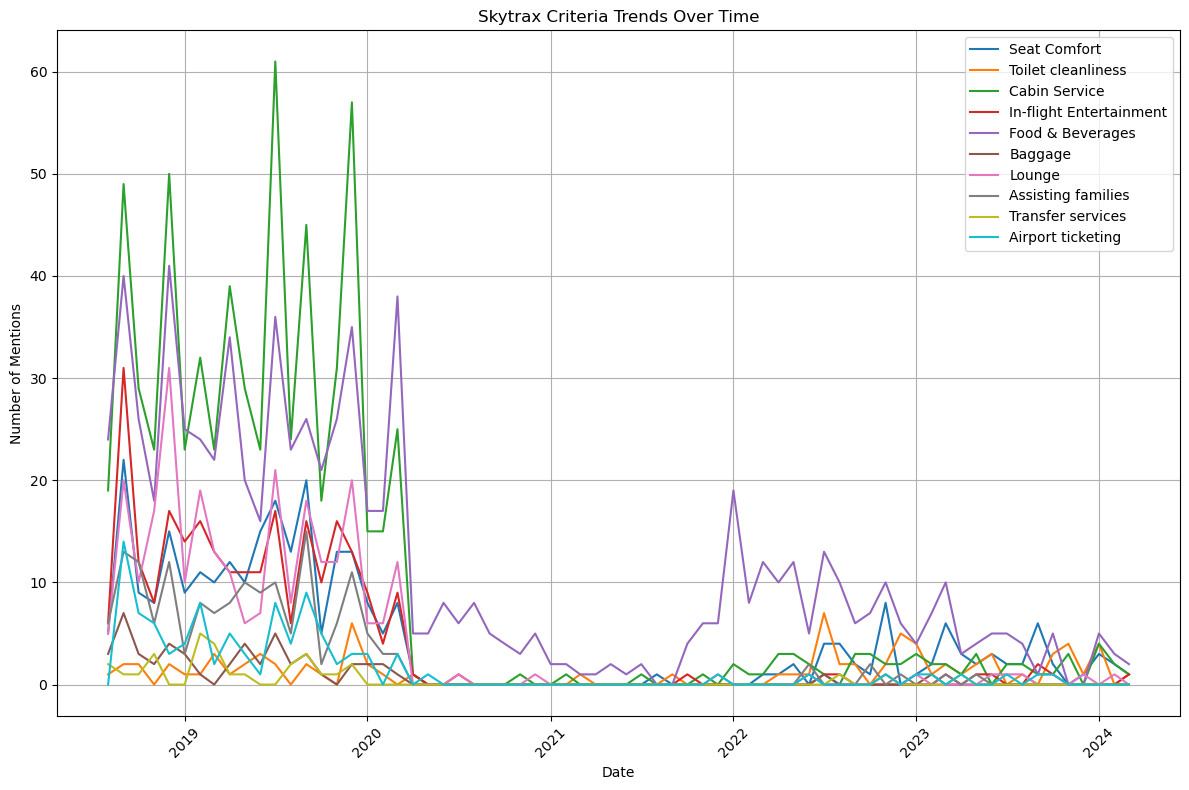

In [124]:
# Step 5: Plot the line graphs for each Skytrax criterion
plt.figure(figsize=(12, 8))
criteria_list = ["Seat Comfort", "Toilet cleanliness", "Cabin Service", "In-flight Entertainment", 
                 "Food & Beverages", "Baggage", "Lounge", "Assisting families","Transfer services","Airport ticketing" ]

for criteria in criteria_list:
    if criteria in monthly_data.columns:
        plt.plot(monthly_data['year_month'], monthly_data[criteria], label=criteria)

plt.title('Skytrax Criteria Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Mentions')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

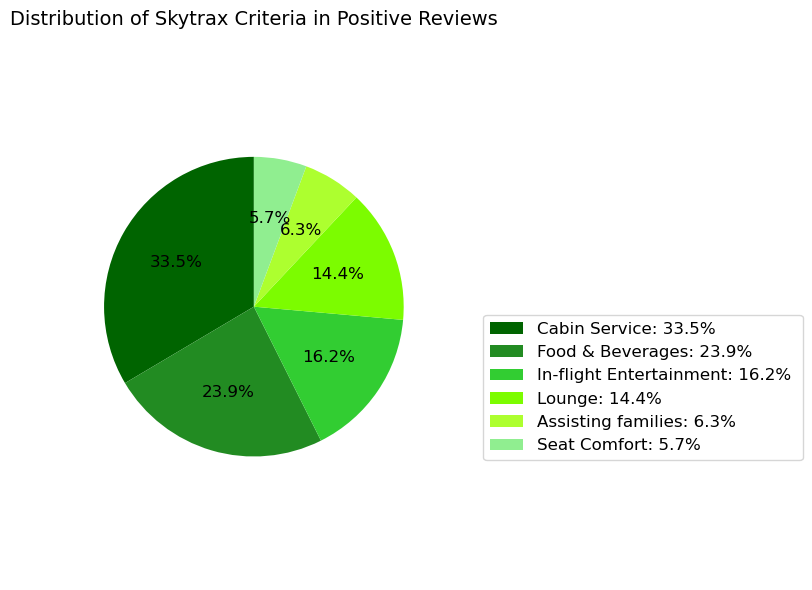

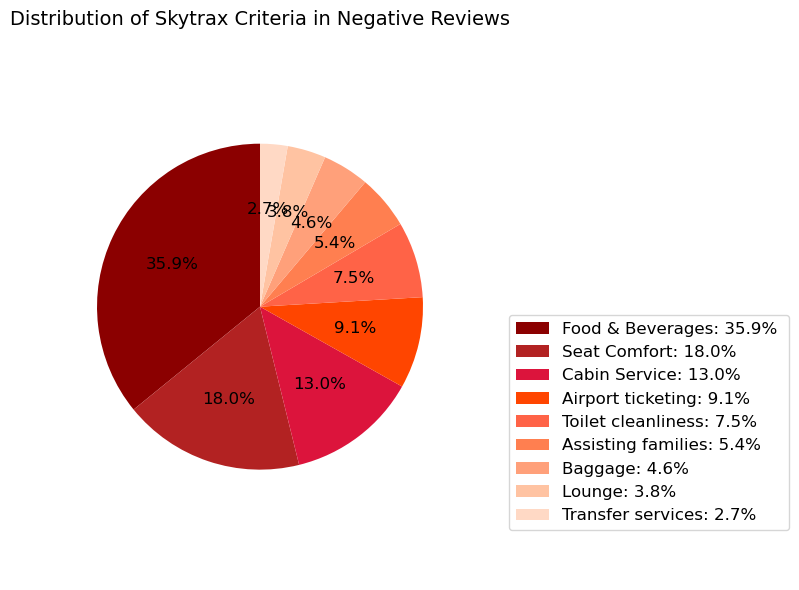

In [127]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Step 1: Separate data into positive and negative sentiments
positive_data = df[df['sentiment'] == 'positive']
negative_data = df[df['sentiment'] == 'negative']

# Step 2: Aggregate counts of each Skytrax criterion for positive and negative reviews
positive_counts = positive_data['criteria'].value_counts()
negative_counts = negative_data['criteria'].value_counts()

# Step 3: Define color palettes for positive (green shades) and negative (red shades)
green_palette = [
    '#006400', '#228B22', '#32CD32', '#7CFC00', '#ADFF2F', '#90EE90', '#98FB98'
]
red_palette = [
    '#8B0000', '#B22222', '#DC143C', '#FF4500', '#FF6347', '#FF7F50', '#FFA07A', '#FFC3A2', '#FFD9C5'
]

# Step 4: Define a function to plot pie charts with custom colors and a legend
def plot_pie_chart_with_legend(data, title, colors):
    plt.figure(figsize=(8, 6))
    wedges, texts, autotexts = plt.pie(
        data, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=colors[:len(data)], 
        textprops={'fontsize': 12}
    )
    
    # Create a legend with labels and percentages
    labels = [f"{label}: {pct} " for label, count, pct in zip(data.index, data, [f'{autotext.get_text()}' for autotext in autotexts])]
    plt.legend(wedges, labels, loc="best", bbox_to_anchor=(1, 0.5), fontsize=12)
    
    plt.title(title, fontsize=14)
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

# Step 5: Plot pie chart for positive reviews with green shades
plot_pie_chart_with_legend(positive_counts, 'Distribution of Skytrax Criteria in Positive Reviews', green_palette)

# Step 6: Plot pie chart for negative reviews with red shades
plot_pie_chart_with_legend(negative_counts, 'Distribution of Skytrax Criteria in Negative Reviews', red_palette)


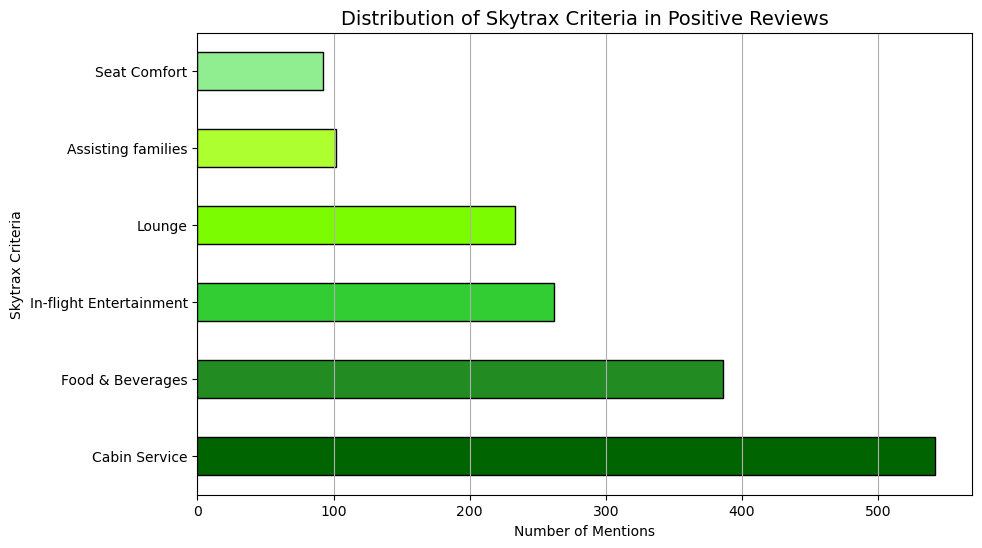

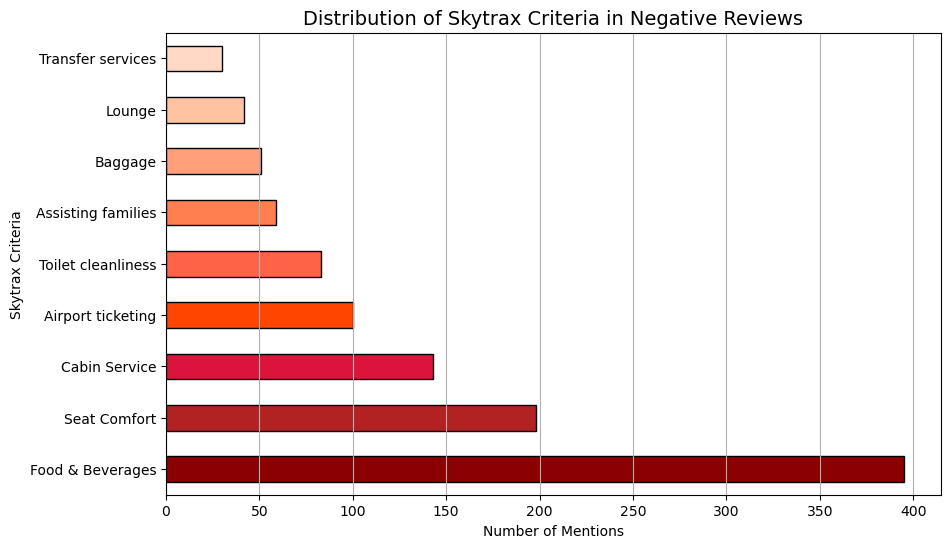

In [128]:
def plot_bar_chart(data, title, colors):
    plt.figure(figsize=(10, 6))
    data.plot(kind='barh', color=colors[:len(data)], edgecolor='black')
    plt.title(title, fontsize=14)
    plt.xlabel('Number of Mentions')
    plt.ylabel('Skytrax Criteria')
    plt.grid(axis='x')
    plt.show()

# Plot bar chart for positive reviews
plot_bar_chart(positive_counts, 'Distribution of Skytrax Criteria in Positive Reviews', green_palette)

# Plot bar chart for negative reviews
plot_bar_chart(negative_counts, 'Distribution of Skytrax Criteria in Negative Reviews', red_palette)


In [129]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load the thematic analysis file
df = pd.read_csv('thematic_analysis_per_review.csv')

# Step 1: Convert 'published_date' to datetime while handling timezone info
df['published_date'] = pd.to_datetime(df['published_date'], errors='coerce', utc=True)
df['published_date'] = df['published_date'].dt.tz_localize(None)

# Step 2: Drop rows where the conversion failed
df = df.dropna(subset=['published_date'])

# Convert the 'topic' column to integers if they are not already
df['topic'] = pd.to_numeric(df['topic'], errors='coerce')

# Define mappings based on Skytrax criteria
skytrax_mapping_positive = {
    "Seat Comfort": [10, 11, 12],
    "Toilet cleanliness": [],
    "Cabin Service": [0, 4, 7, 13],
    "In-flight Entertainment": [5, 9],
    "Food & Beverages": [1, 2, 6],
    "Baggage": [],
    "Lounge": [3, 12],
    "Assisting families": [8]
}

skytrax_mapping_negative = {
    "Airport ticketing": [0],
    "Seat Comfort": [4],
    "Toilet cleanliness": [12],
    "Cabin Service": [7, 10, 13],
    "In-flight Entertainment": [],
    "Food & Beverages": [1, 2, 6],
    "Baggage": [3],
    "Lounge": [8],
    "Assisting families": [5],
    "Transfer services": [9, 11]
}

def map_topic_to_criteria(topic, sentiment):
    if pd.isna(topic):
        return None
    topic = int(topic)
    if sentiment == 'positive':
        for criteria, topics in skytrax_mapping_positive.items():
            if topic in topics:
                return criteria
    else:
        for criteria, topics in skytrax_mapping_negative.items():
            if topic in topics:
                return criteria
    return None

# Map topics to criteria
df['criteria'] = df.apply(lambda row: map_topic_to_criteria(row['topic'], row['sentiment']), axis=1)
df.dropna(subset=['criteria'], inplace=True)



/Users/natamontosawat/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/natamontosawat/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/natamontosawat/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/natamontosawat/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency inform

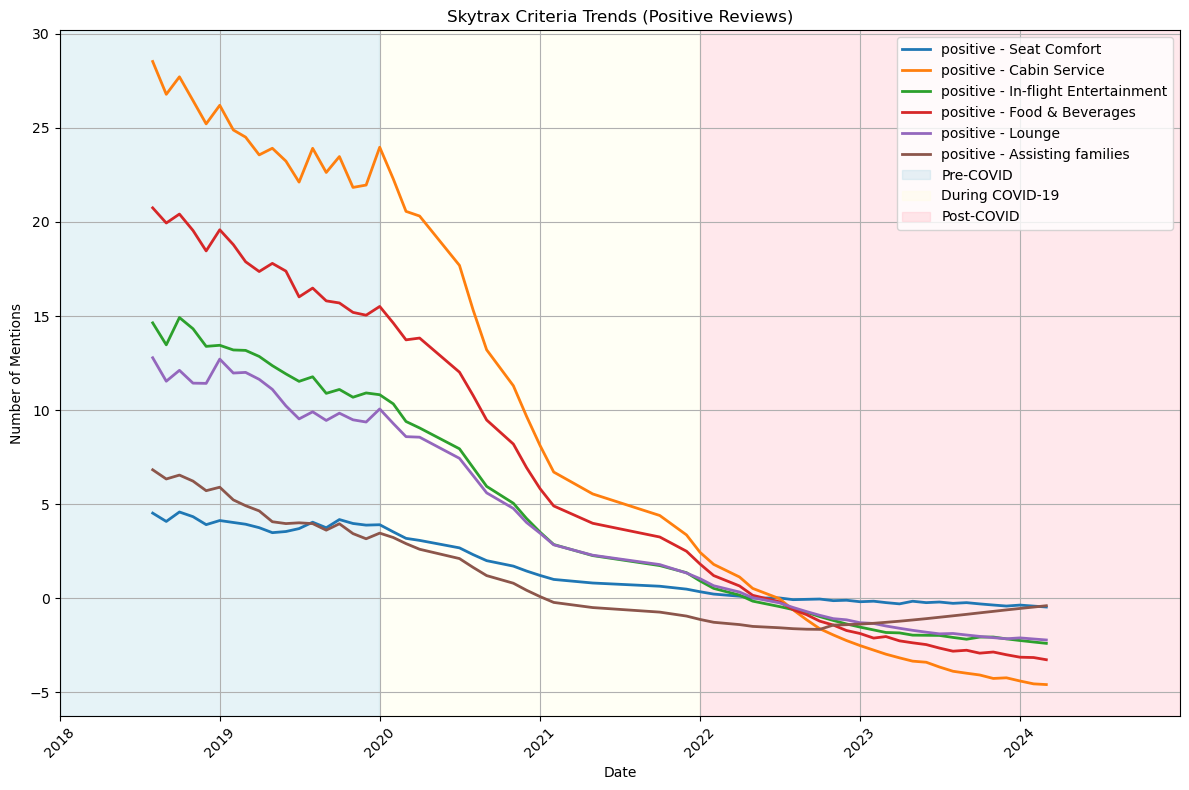

In [130]:
# Step 3: Aggregate the data by month, sentiment, and criteria
df['year_month'] = df['published_date'].dt.to_period('M')
positive_df = df[df['sentiment'] == 'positive']
negative_df = df[df['sentiment'] == 'negative']

# Function to apply ETS model and plot with phase highlighting
def plot_ets_smoothing(data, sentiment, criteria_list):
    plt.figure(figsize=(12, 8))
    
    for criteria in criteria_list:
        if criteria not in data.columns:
            continue

        # Prepare the time series data for the ETS model
        ts_data = data.set_index('year_month')[criteria]

        # Apply ETS model
        model = ExponentialSmoothing(ts_data, trend='add', seasonal=None)
        fit_model = model.fit(smoothing_level=0.1, optimized=True)
        forecast = fit_model.fittedvalues

        # Plot the smoothed trend line
        plt.plot(ts_data.index, forecast, label=f'{sentiment} - {criteria}', linewidth=2)
    
    # Add phase highlights
    plt.axvspan('2018-01-01', '2019-12-31', color='lightblue', alpha=0.3, label='Pre-COVID')
    plt.axvspan('2020-01-01', '2021-12-31', color='lightyellow', alpha=0.3, label='During COVID-19')
    plt.axvspan('2022-01-01', '2024-12-31', color='lightpink', alpha=0.3, label='Post-COVID')

    # Set x-axis limits and format
    plt.xlim(pd.Timestamp('2018-01-01'), pd.Timestamp('2024-12-31'))
    plt.xticks(rotation=45)
    plt.tight_layout()

    plt.title(f'Skytrax Criteria Trends ({sentiment.capitalize()} Reviews)')
    plt.xlabel('Date')
    plt.ylabel('Number of Mentions')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Group data by month and criteria for positive and negative reviews
monthly_data_positive = positive_df.groupby(['year_month', 'criteria']).size().unstack(fill_value=0).reset_index()
monthly_data_negative = negative_df.groupby(['year_month', 'criteria']).size().unstack(fill_value=0).reset_index()

monthly_data_positive['year_month'] = monthly_data_positive['year_month'].dt.to_timestamp()
monthly_data_negative['year_month'] = monthly_data_negative['year_month'].dt.to_timestamp()

# Define the list of criteria to analyze
criteria_list = ["Seat Comfort", "Toilet cleanliness", "Cabin Service", "In-flight Entertainment", 
                 "Food & Beverages", "Baggage", "Lounge", "Assisting families", "Transfer services", "Airport ticketing"]

# Plot for positive reviews
plot_ets_smoothing(monthly_data_positive, 'positive', criteria_list)

/Users/natamontosawat/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/natamontosawat/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/natamontosawat/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/natamontosawat/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/natamontosawat/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: Valu

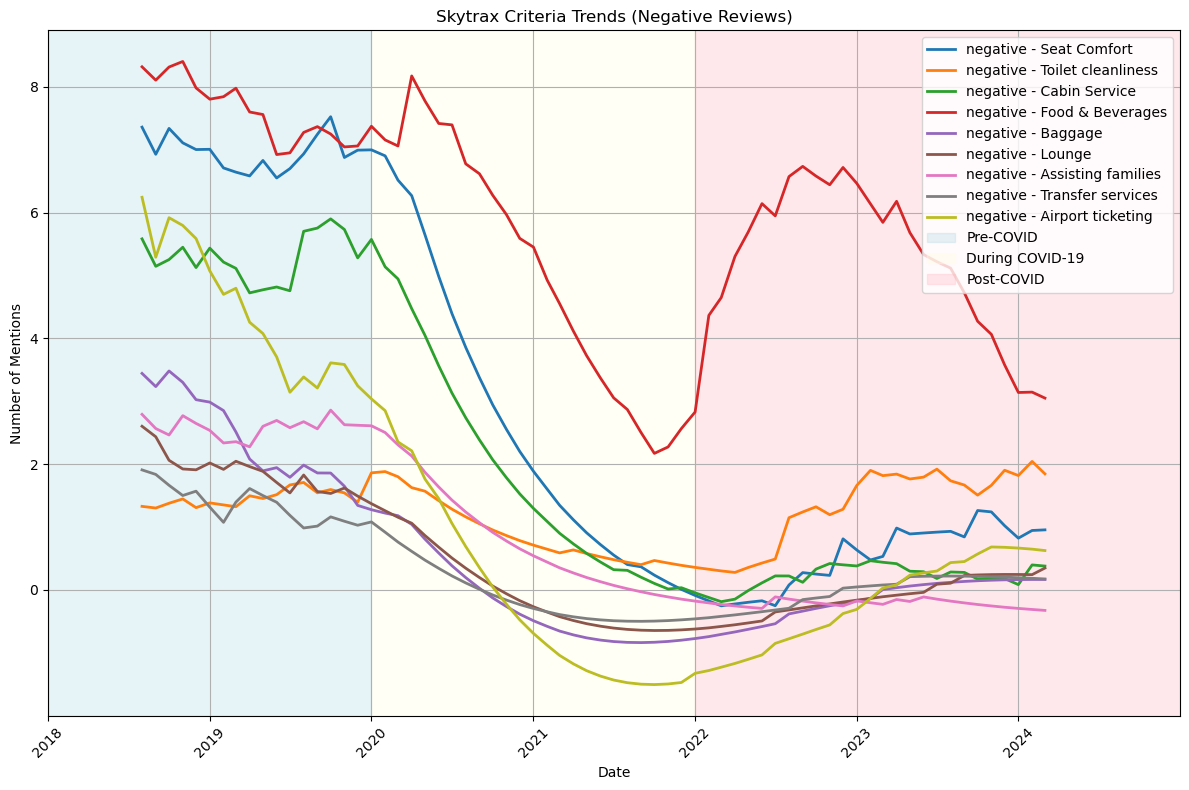

In [131]:
# Plot for negative reviews
plot_ets_smoothing(monthly_data_negative, 'negative', criteria_list)

# Predicting Future Complaints in Key Areas

In [158]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load the thematic analysis file
df = pd.read_csv('thematic_analysis_per_review.csv')

# Step 1: Convert 'published_date' to datetime while handling timezone info
df['published_date'] = pd.to_datetime(df['published_date'], errors='coerce', utc=True)
df['published_date'] = df['published_date'].dt.tz_localize(None)

# Step 2: Drop rows where the conversion failed
df = df.dropna(subset=['published_date'])

# Convert the 'topic' column to integers if they are not already
df['topic'] = pd.to_numeric(df['topic'], errors='coerce')

# Define mappings for key areas of negative sentiment
skytrax_mapping_negative = {
    "Food & Beverages": [1, 2, 6],
    "Seat Comfort": [4],
    "Baggage": [3],
    "Lounge": [8],
    "Cabin Service": [7, 10, 13],
    "Toilet Cleanliness": [12],
    "Airport Ticketing": [0]
}

def map_topic_to_criteria(topic, sentiment):
    if pd.isna(topic):
        return None
    topic = int(topic)
    if sentiment == 'negative':
        for criteria, topics in skytrax_mapping_negative.items():
            if topic in topics:
                return criteria
    return None

# Map topics to criteria
df['criteria'] = df.apply(lambda row: map_topic_to_criteria(row['topic'], row['sentiment']), axis=1)
df.dropna(subset=['criteria'], inplace=True)


In [159]:
# Step 3: Aggregate the data by month, sentiment, and criteria
df['year_month'] = df['published_date'].dt.to_period('M')
negative_df = df[df['sentiment'] == 'negative']

# Group data by month and criteria for negative reviews
monthly_data_negative = negative_df.groupby(['year_month', 'criteria']).size().unstack(fill_value=0).reset_index()
monthly_data_negative['year_month'] = monthly_data_negative['year_month'].dt.to_timestamp()

# Define the list of criteria to forecast
criteria_list = ["Food & Beverages", "Seat Comfort", "Cabin Service", "Toilet Cleanliness", "Airport Ticketing", "Lounge","Baggage" ]


In [152]:
# Step 4: Function to apply ETS model and plot forecasts
def plot_ets_forecast(data, criteria):
    plt.figure(figsize=(10, 6))

    if criteria not in data.columns:
        print(f"No data available for {criteria}")
        return

    # Prepare the time series data for the ETS model
    ts_data = data.set_index('year_month')[criteria]

    # Apply ETS model
    model = ExponentialSmoothing(ts_data, trend='add', seasonal=None)
    fit_model = model.fit(smoothing_level=0.1, optimized=True)
    forecast = fit_model.forecast(24)  # Forecast for the next 24 months

    # Plot actual data and forecast
    plt.plot(ts_data.index, ts_data, label='Actual', color='darkblue')
    plt.plot(forecast.index, forecast, label='Forecast', color='red', linestyle='--')
    plt.fill_between(forecast.index, forecast - 5, forecast + 5, color='orange', alpha=0.1)
    
    # Set y-axis limits to ensure no negative values
    plt.ylim(0, max(ts_data.max(), forecast.max()) + 10)

    plt.title(f'Forecasting Complaints for {criteria}')
    plt.xlabel('Month')
    plt.ylabel('Number of Complaints')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

/Users/natamontosawat/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


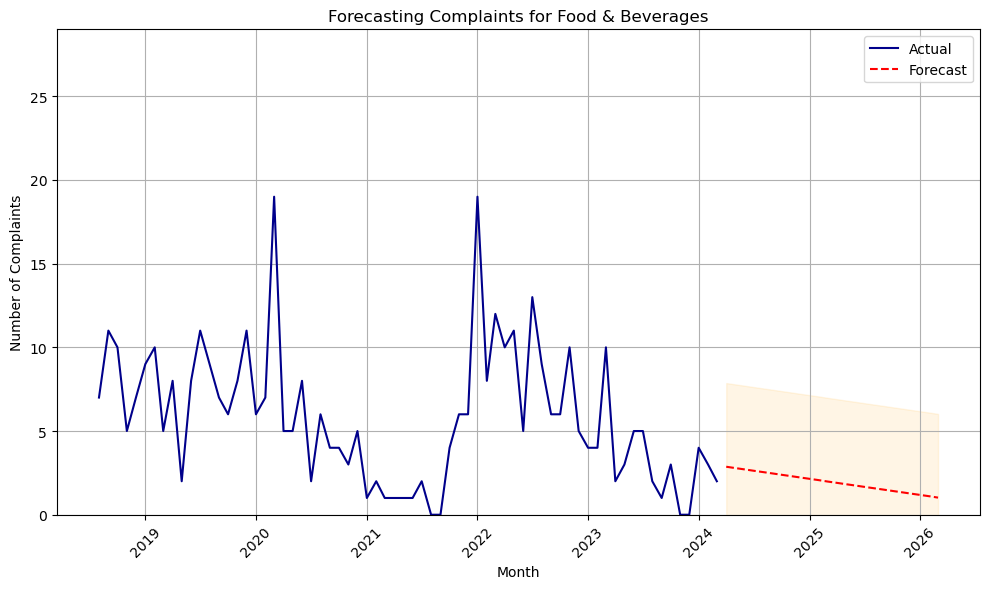

/Users/natamontosawat/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


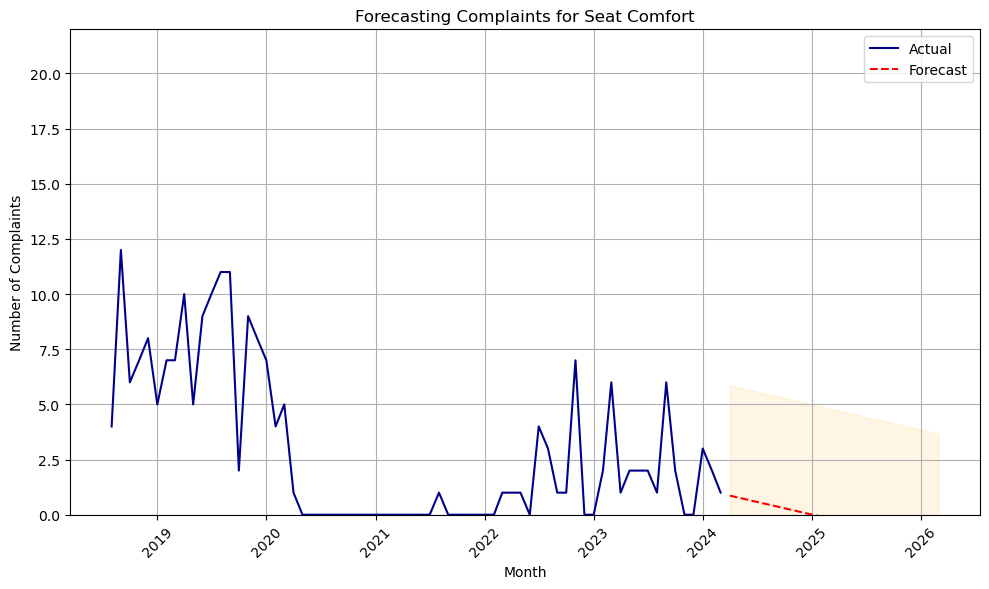

/Users/natamontosawat/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


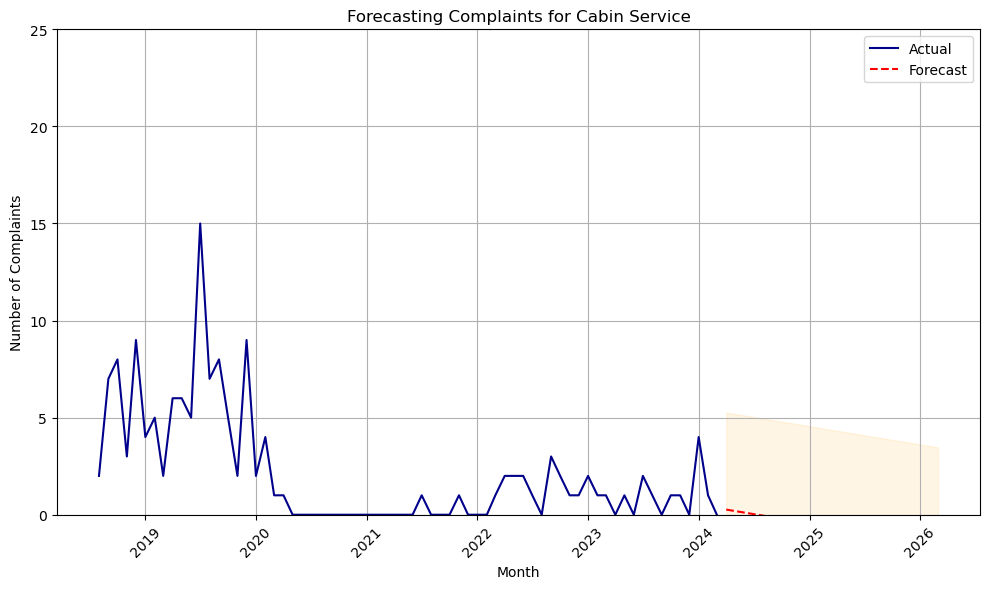

/Users/natamontosawat/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


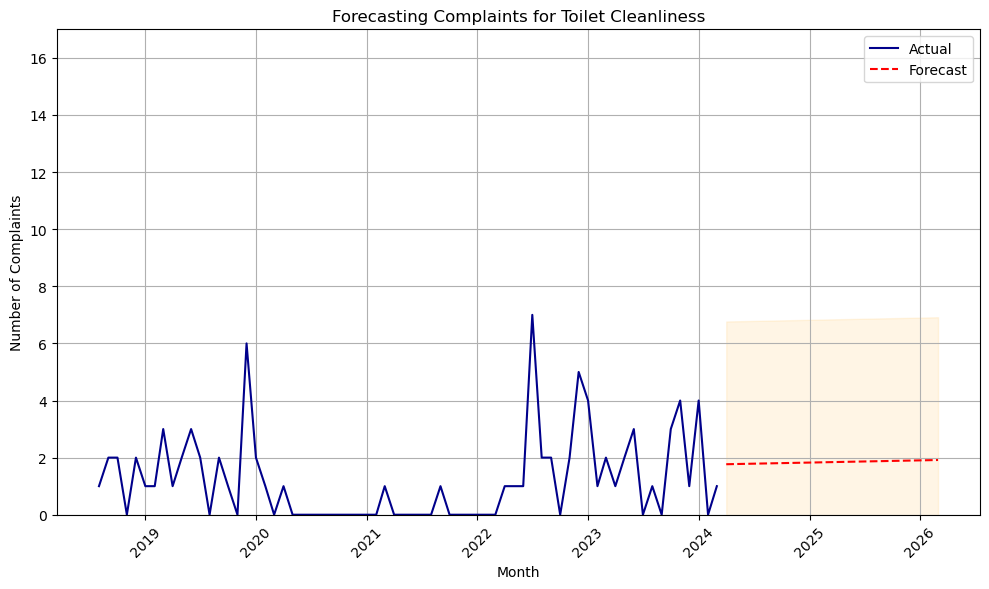

/Users/natamontosawat/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


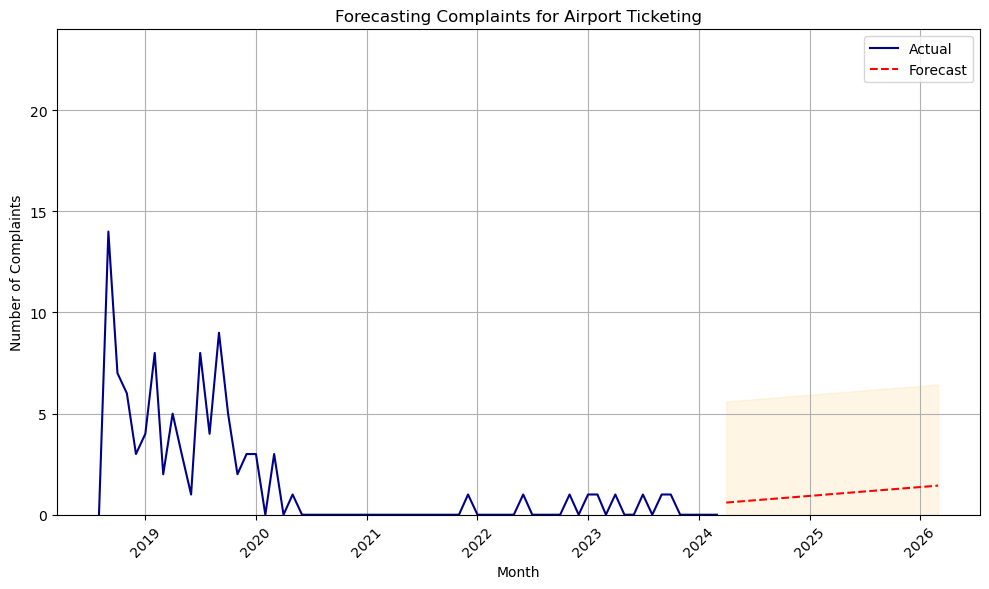

/Users/natamontosawat/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


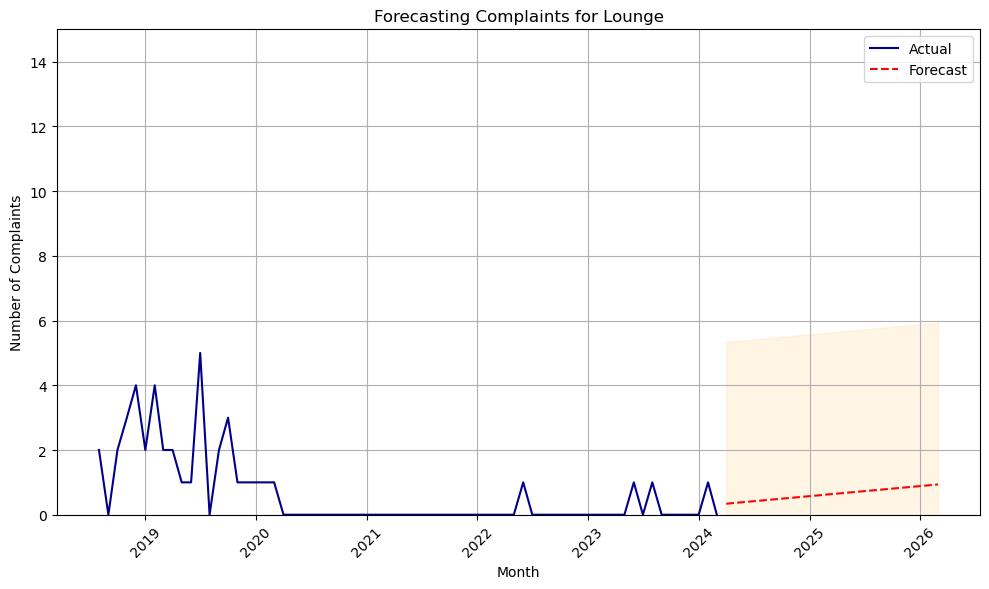

/Users/natamontosawat/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


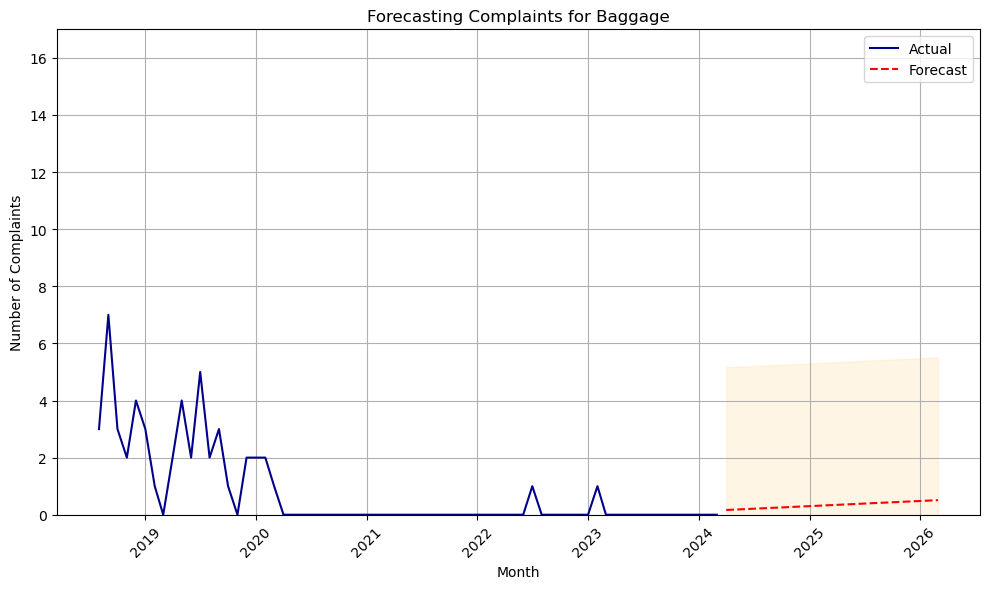

In [160]:
# Step 5: Plot forecasts for each of the key areas
for criteria in criteria_list:
    plot_ets_forecast(monthly_data_negative, criteria)